# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#importing Pandas and Json library
import pandas as pd
import json
import matplotlib.pyplot as plt

In [9]:
#Reading the Json file into json_df as a dataframe
json_df=pd.read_json('data/world_bank_projects.json')

In [10]:
#Printing the head of the data frame to check if the read was correctly done
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [11]:
#Checking the shape of the dataframe
json_df.shape

(500, 50)

In [12]:
#grouping the dataframe by country and assigning to json_gp_by_country
json_group_by_country = json_df.groupby('countryname').count()

In [13]:
#Cheking the grouped dataframe
json_group_by_country.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryshortname,docty,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
countryname,,,,,,,,,,,,,,,,,,,,,
Africa,11,11,11,11,11,7,11,11,11,10,...,11,11,11,11,11,11,11,11,11,11
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Arab Republic of Egypt,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
Argentine Republic,2,2,2,2,2,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Bosnia and Herzegovina,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
#Creating new sorted dataframe
json_group_by_country_sorted=json_group_by_country.sort_values(['id'], ascending = [0])

In [15]:
#Slicing top 10 countries with most projects
top_10_countries = json_group_by_country_sorted['id'].head(10)

In [16]:
#Printing top 10 countries with most projects
print(top_10_countries)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: id, dtype: int64


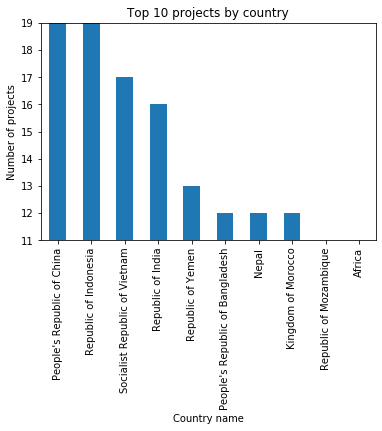

In [17]:
top_10_countries.plot.bar()
plt.xlabel('Country name')
plt.ylabel('Number of projects')
plt.title('Top 10 projects by country')
axes = plt.gca()
axes.set_ylim([top_10_countries.min(),top_10_countries.max()])
plt.show()

In [18]:
#Creating empty dictionary to provide count of mjtheme_namecode
count_namecode_dict={}

In [19]:
#Populating the dictionary with mjtheme_name and its count as we iterate over all of the items
for i in json_df['mjtheme_namecode']:
    for j in i:
        if j['name'] in count_namecode_dict.keys():
            count_namecode_dict[j['name']] = count_namecode_dict[j['name']]+1
        else:
            count_namecode_dict[j['name']] = 1

In [20]:
count_namecode_dict

{'Human development': 197,
 '': 122,
 'Economic management': 33,
 'Social protection and risk management': 158,
 'Trade and integration': 72,
 'Public sector governance': 184,
 'Environment and natural resources management': 223,
 'Social dev/gender/inclusion': 119,
 'Financial and private sector development': 130,
 'Rural development': 202,
 'Urban development': 47,
 'Rule of law': 12}

In [21]:
#Creating Dataframe from the dictionary of counts
namecode_count_df=pd.DataFrame.from_dict(count_namecode_dict, orient='index')
namecode_count_df.reset_index(inplace=True)
namecode_count_df.rename(columns={'index':'Project name', 0: 'Count'}, inplace=True)

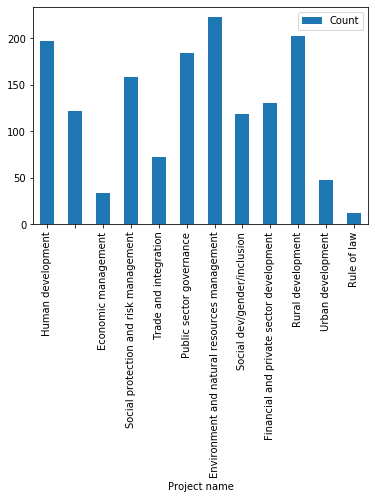

In [22]:
namecode_count_df.plot.bar(x='Project name', y= 'Count')

In [23]:
#Creating dictionary of unique project code and corresponding name
dict_namecode={}
for i in json_df['mjtheme_namecode']:
    for j in i:
        if j['name'] not in dict_namecode.keys():
            if len(j['name']) > 0:
                dict_namecode[j['name']] = j['code']

In [24]:
#Creating new dataframe for correction
json_df_corrected = json_df

In [25]:
#Updating 
for i in json_df_corrected['mjtheme_namecode']:
    for j in i:
        if len(j['name']) == 0:
            for name, code in dict_namecode.items():  # for name, age in dictionary.iteritems():
                if code == j['code']:
                    j['name']=name